# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
import numpy as np

# Choose features
X = iris.data[:, :2]

#Eliminate classs 2
mask = iris.target !=2
X = X[mask]
y = iris.target[mask]

print(X.shape)
print(set(y))

# Split data into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

# Use a Support Vector Machine for classification
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)


(100, 2)
{np.int64(0), np.int64(1)}
(80, 2)
(20, 2)


SVC(kernel='linear')

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

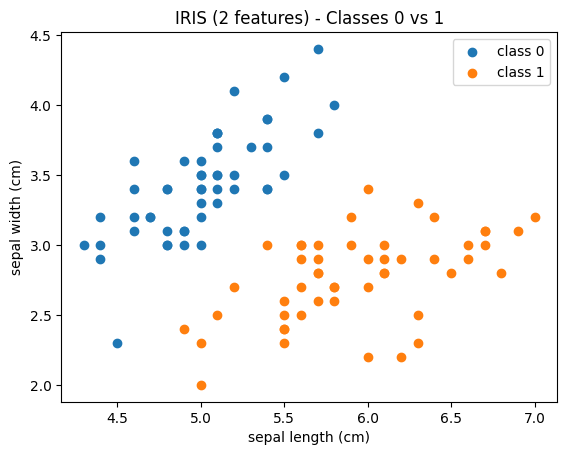

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("IRIS (2 features) - Classes 0 vs 1")
plt.legend()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [8]:
C_value = 200
SVMmodel = SVC(kernel='linear', C=C_value)
SVMmodel.fit(X_train, y_train)
print("Test accuracy:", SVMmodel.score(X_test, y_test))

Test accuracy: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

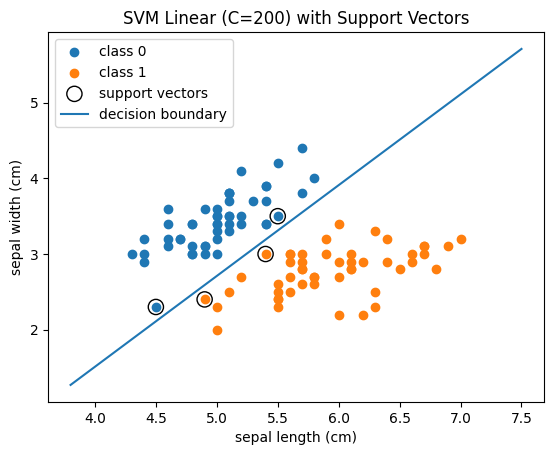

W: [ 6.3154899  -5.26238666] b: -17.316424920734285


In [9]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_[0]
b=SVMmodel.intercept_[0]

# Decision boundary: w0*x0 + w1*x1 + b = 0  => x1 = -(w0*x0 + b)/w1
x0_min, x0_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
x0_line = np.linspace(x0_min, x0_max, 200)

# w1가 0에 가까우면(드물지만) 직선 대신 수직선 처리
plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1')

# Plot support vectors
plt.scatter(supvectors[:,0], supvectors[:,1], s=120, facecolors='none', edgecolors='k', label='support vectors')

if abs(W[1]) > 1e-12:
    x1_line = -(W[0]*x0_line + b) / W[1]
    plt.plot(x0_line, x1_line, label='decision boundary')
else:
    # vertical line: x0 = -b/w0
    x0_vertical = -b / W[0]
    plt.axvline(x0_vertical, label='decision boundary')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"SVM Linear (C={C_value}) with Support Vectors")
plt.legend()
plt.show()

print("W:", W, "b:", b)


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

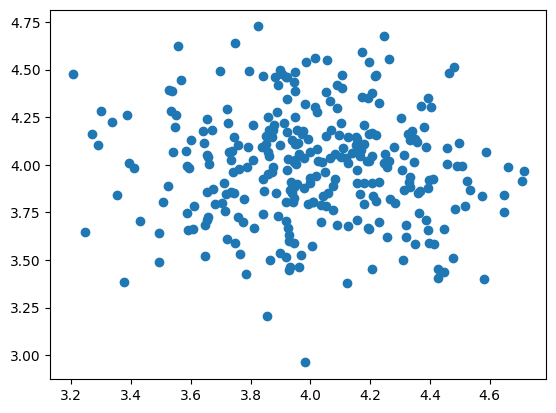

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

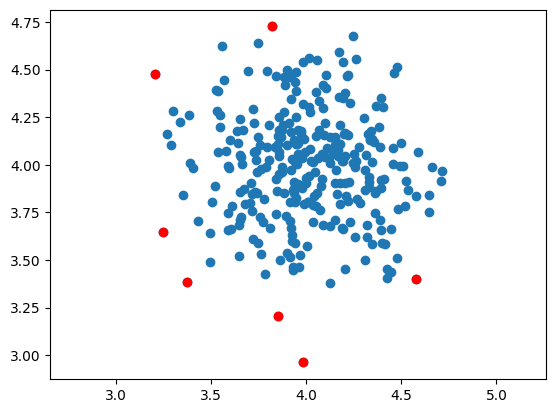

In [11]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

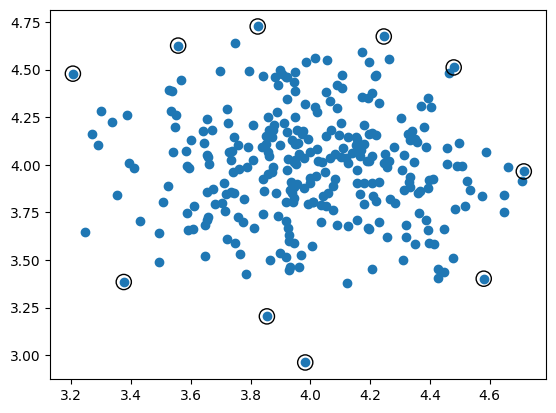

In [13]:
sv_one = SVMmodelOne.support_vectors_

plt.scatter(x[:,0], x[:,1], label='data')
plt.scatter(sv_one[:,0], sv_one[:,1], s=120, facecolors='none', edgecolors='k', label='support vectors')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


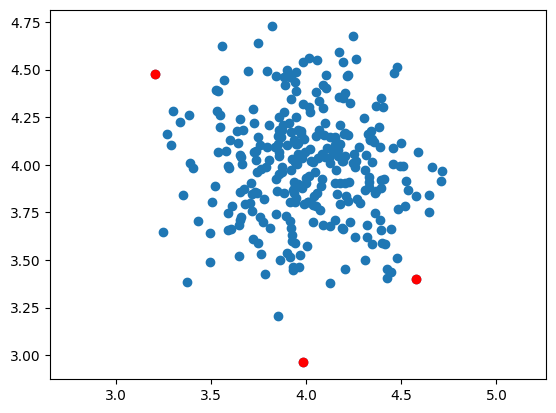

In [14]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()